In [15]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Taking a look at a DICOM with Fiji
input_directory = '../manifest-1682149462693/LCTSC/LCTSC-Test-S1-101/03-03-2004-NA-NA-08186/NA-79262'

reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(input_directory)
reader.SetFileNames(dicom_names)
image = reader.Execute()

size = image.GetSize()
print("Image size:", size)

sitk.Show(image)

Image size: (512, 512, 130)


In [17]:
npa = sitk.GetArrayViewFromImage(image)
npa.shape

(130, 512, 512)

(-0.5, 511.5, 511.5, -0.5)

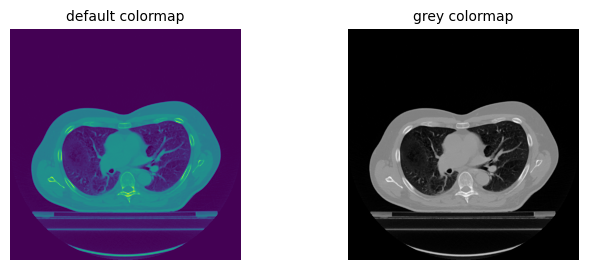

In [18]:
npa_slice = npa[65]

# A few plots with matplotlib
fig = plt.figure(figsize=(8,3))

fig.add_subplot(1,2,1)
plt.imshow(npa_slice)
plt.title('default colormap', fontsize=10)
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(npa_slice, cmap=plt.cm.Greys_r);
plt.title('grey colormap', fontsize=10)
plt.axis('off')

In [5]:
# MIP projections
slices_num = 15
img_shape = npa.shape
mip = np.zeros(img_shape)
for i in range(img_shape[0]):
    start = max(0, i-slices_num)
    mip[i,:,:] = np.amax(npa[start:i+1],0)

In [6]:
mip.shape

(130, 512, 512)

In [8]:
import cv2

for i, plot in enumerate(mip):
    fname = 'plots/mip/' + str(i) + ' mip.png'
    cv2.imwrite(fname, img=mip[i])

In [9]:
# Wrap the previous workflow into a function
import os

def dicom_to_mpi(input_directory, output_directory, slices_num=15):
    reader = sitk.ImageSeriesReader()
    reader.SetFileNames(reader.GetGDCMSeriesFileNames(input_directory))
    image = reader.Execute()
    npa = sitk.GetArrayViewFromImage(image)

    # MIP projections
    img_shape = npa.shape
    mip = np.zeros(img_shape)
    for i in range(img_shape[0]):
        start = max(0, i-slices_num)
        mip[i,:,:] = np.amax(npa[start:i+1],0)

    dirname = f'plots/{output_directory}'
    if not os.path.exists(dirname):
        os.makedirs(dirname)

    for i, plot in enumerate(mip):
        fname = f'{str(i)} mip.png'
        cv2.imwrite(f'{dirname}/{fname}', img=mip[i])

In [10]:
# Make a few plots
input_directory = '../manifest-1682149462693/LCTSC/LCTSC-Test-S1-101/03-03-2004-NA-NA-08186/NA-79262'
dicom_to_mpi(input_directory, '01 mpi')

input_directory = '../manifest-1682149462693/LCTSC/LCTSC-Test-S1-102/11-04-2003-NA-RTRCCTTHORAX8FHigh Adult-20444/0.000000-CT114545RespCT  3.0  B30f  50 Ex-81163'
dicom_to_mpi(input_directory, '02 mpi')

input_directory = '../manifest-1682149462693/LCTSC/LCTSC-Test-S1-103/11-09-2003-NA-RTRCCTTHORAX8FHigh Adult-03264/0.000000-CT140006RespCT  3.0  B30f  50 Ex-17374'
dicom_to_mpi(input_directory, '03 mpi')

In [12]:
# Testing pydicom
import pydicom

filename = '../manifest-1682149462693/LCTSC/LCTSC-Test-S1-101/03-03-2004-NA-NA-08186/1.000000-NA-56597/1-1.dcm'

ds = pydicom.dcmread(filename)

In [13]:
# Printing is too long
# print(ds)

In [14]:
filename = '../manifest-1682149462693/LCTSC/LCTSC-Test-S1-101/03-03-2004-NA-NA-08186/NA-79262/1-001.dcm'

ds = pydicom.dcmread(filename)

print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7014.4598.333558838494389990779252095328
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20050726'
(0008, 0013) Instance Creation Time              TM: '091154.839000'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) S